In [52]:
import matplotlib.axes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
data = {'query1': ['16984.9981214|begin; set transaction isolation level read committed;|', "16987.0179584|update accounts set amount = 600 where username = 'Adam';|", "16990.0368798|update accounts set amount = 400 where username = 'Oliver';|", '16991.0438298|commit;|', "16992.0483279|select * from accounts;|[{'id': 1, 'username': 'Adam', 'amount': 600.0}, {'id': 2, 'username': 'Oliver', 'amount': 400.0}]"], 'query2': ['16986.0037839|begin; set transaction isolation level read committed;|', "16988.0321656|update accounts set amount = 400 where username = 'Adam';|", '16991.04513|late execution;|', "16993.0485919|update accounts set amount = 600 where username = 'Oliver';|", '16994.0545888|commit;|', "16995.0584962|select * from accounts;|[{'id': 1, 'username': 'Adam', 'amount': 400.0}, {'id': 2, 'username': 'Oliver', 'amount': 600.0}]"]}

In [54]:
import json

In [55]:
df1 = pd.read_json(json.dumps(data["query1"]))
df2 = pd.read_json(json.dumps(data["query2"]))


C:\Users\Asus\AppData\Local\Temp\ipykernel_27252\3199431576.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_json(json.dumps(data["query1"]))
C:\Users\Asus\AppData\Local\Temp\ipykernel_27252\3199431576.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_json(json.dumps(data["query2"]))


In [56]:
df1

,0
0,16984.9981214|begin; set transaction isolation...
1,16987.0179584|update accounts set amount = 600...
2,16990.0368798|update accounts set amount = 400...
3,16991.0438298|commit;|
4,16992.0483279|select * from accounts;|[{'id': ...


In [57]:
df1[['Time','Query', 'Data']] = df1[0].str.split('|', expand=True)
df1.drop(columns=[0], inplace=True)

In [58]:
df2[['Time','Query', 'Data']] = df2[0].str.split('|', expand=True)
df2.drop(columns=[0], inplace=True)

In [59]:
df1['Query + Data'] = df1['Query'] + "\n" + df1['Data'].str.replace("}, {", '},\n{')
for index, row in df1.iterrows():
    df1['Query + Data'][index] = str(index + 1) + ". " + df1['Query + Data'][index]
    

In [60]:
df2['Query + Data'] = df2['Query'] + "\n" + df2['Data'].str.replace("}, {", '},\n{')
for index, row in df2.iterrows():
    df2['Query + Data'][index] = str(index + 1) + ". " + df2['Query + Data'][index]

In [67]:
df2

,Time,Query,Data,Query + Data,Timedelta
0,16986.003784,begin; set transaction isolation level read co...,,1. begin; set transaction isolation level read...,NaN
1,16988.032166,update accounts set amount = 400 where usernam...,,2. update accounts set amount = 400 where user...,2.028382
2,16991.045130,late execution;,,3. late execution;\n,3.012964
3,16993.048592,update accounts set amount = 600 where usernam...,,4. update accounts set amount = 600 where user...,2.003462
4,16994.054589,commit;,,5. commit;\n,1.005997
5,16995.058496,select * from accounts;,"[{'id': 1, 'username': 'Adam', 'amount': 400.0...","6. select * from accounts;\n[{'id': 1, 'userna...",1.003907


In [62]:
df1['Time'] = df1['Time'].astype(float)
df2['Time'] = df2['Time'].astype(float)

In [63]:
df1['Timedelta'] = df1['Time'].diff()
df2['Timedelta'] = df2['Time'].diff()

In [64]:
sns.set_theme(style="whitegrid")

In [65]:
def create_plot(array_of_df, pallette):
    fig, axes = plt.subplots(2,1, sharex=True, figsize=(10,6))
    for i, df  in enumerate(array_of_df):
        ax = sns.lineplot(data=df, x='Time', y='Query + Data', marker='o', color=pallette[i], ax=axes[i])
        """if index >= 2:
            for i, value in enumerate(df['Date']):
                ax.axvline(x=value, color=pallette[index], linestyle='--')"""
        for index, row in df.iterrows():
            if 'Previous query' in df['Query'][index] :
                plt.plot([df.loc[index-1, 'Time'], df.loc[index, 'Time']], [index-1, index], color='red', linestyle='-', linewidth=2)
            axes[0].axvline(x=df['Time'][index], color='grey', linestyle='--')
            axes[1].axvline(x=df['Time'][index], color='grey', linestyle='--')
            #plt.axvline(x=df['Time'][index], color='grey', linestyle='--')
            #ax.text(x=row['Date'], y=row['Message'], s=int(row['Amount']))

C:\FIIT\ZS_2023\BIT\Projekt\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\FIIT\ZS_2023\BIT\Projekt\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\FIIT\ZS_2023\BIT\Projekt\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\FIIT\ZS_2023\BIT\Projekt\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

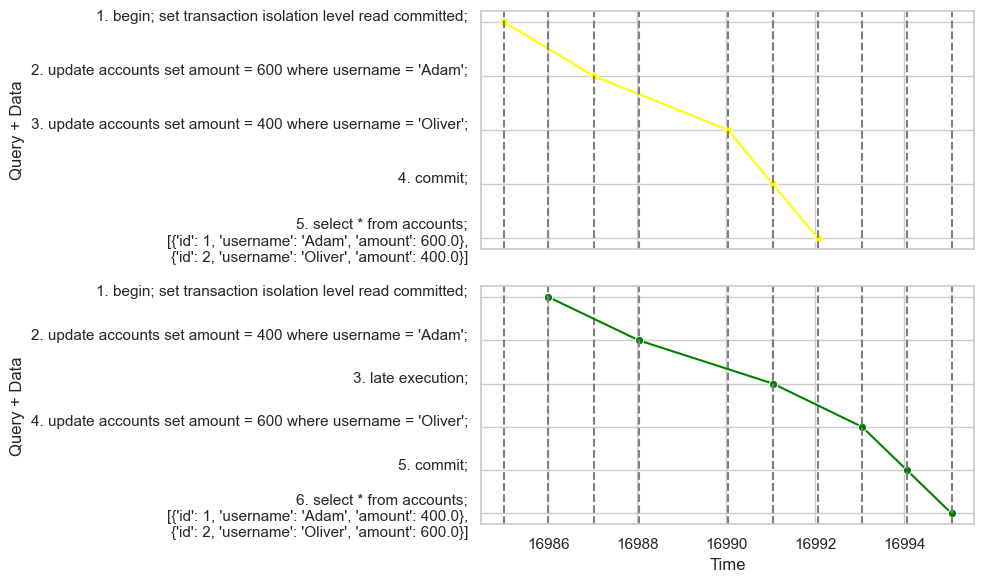

In [66]:
#sns.set(rc={'figure.figsize':(10,5)})
create_plot([df1, df2], ['yellow', 'Green'])
plt.tight_layout()
plt.show()